# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №4

Задание выполнил(а): Пучкова Арина

### Общая информация

__Дата выдачи:__ 18.05.2020

__Дедлайн:__ 23:59 27.05.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
min(\text{points}, 17)  \times 10 / 17,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 17, если вы получите 19 или 20 баллов вы также получите 1 бонусный балл сверху. Также вы можете использовать бонусные баллы, которые накопили ранее.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Random Forest своими руками (4 балла)

Реализуйте алгоритм случайного леса. В соответствии с построением алгоритма, ваша реализация должна сочетать в себе метод бэггинга и метод случайных подмножеств. Также она должна работать для двух типов задач: как для задачи регрессии, так и для задачи классификации.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn`.*

In [2]:
class RandomForest:
    def __init__(self, n_estimators, max_depth, max_features='sqrt', task_type='regression'):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        max_features - 'sqrt' for sqrt(n_features)
                       'log2' for log2(n_features)
                        None  for n_features 
                        as maximum features for each split in DecisionTree from sklearn
        task_type - 'regression' or 'classification'
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.task_type = task_type
        self.max_features = max_features
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        self.X_train = X_train
        self.y_train = y_train

        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        self.X_test = X_test
        
        q_features = 0 #это максимум признаков, которые будут использоваться в деревьях. Если в дерево поступает max_features меньше,
        #чем число фичей в X_train, то признаки будут выбраны рандомно – что нам и нужно. 
        if self.max_features == 'sqrt':
            q_features = int(np.sqrt(self.X_train.shape[1]))
        elif self.max_features == 'log2':
            q_features = int(np.log2(self.X_train.shape[1]))
        elif self.max_features == None: 
            q_features = int(self.X_train.shape[1]) 
        
        forest = []
        for n in range(self.n_estimators):
            bootstrap = np.random.choice(np.arange(0, X_train.shape[0]), size = X_train.shape[0], replace = True)
            #это строка создает вектор длиной равной числу наблюдений. Там могут быть 0, то есть какие-то признаки не войдут
            #или число может повториться – и наблюдение войдет два раза. Полученные числа – это индексы наблюдений, с поомщью 
            #них выбираем некоторые строки из X_train и y_train. Поскольку это строчка в цикле, который пробегает по всем деревьям,
            #своя выборка получается для каждого дерева. 
            bootstrap_X = self.X_train[bootstrap]
            bootstrap_y = self.y_train[bootstrap]
            if self.task_type == 'regression':
                grow_tree = DecisionTreeRegressor(max_depth = self.max_depth, max_features = q_features)
            elif self.task_type == 'classification':
                grow_tree = DecisionTreeClassifier(max_depth = self.max_depth, max_features = q_features)
            grow_tree.fit(bootstrap_X, bootstrap_y)
            forest.append(grow_tree)
            
            if self.task_type == 'regression':
                y_pred = np.mean([tree.predict(self.X_test) for tree in forest], axis = 0) #усредняем ответы деревьев
                
            elif self.task_type == 'classification':
                y_pred = [np.array(tree.predict(self.X_test)) for tree in forest] #тут предсказания всех деревьев по каждому наблюдени/
            #то есть для каждого наблюдения у нас n деревьев. Для каждого i-ого наблюдения X_test нужно взять моду ответов 
            #n деревьев. 
                y_pred = [int(np.median(row)) for row in np.array(y_pred).T] #эта ужасно кривая строчка выводит
                #медиану по каждому столбцу – самый популярный класс будет медианой 
    

        return y_pred

Проверьте вашу реализацию на задаче регрессии. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10.25 **(не меняйте параметры сида)**.

In [3]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [4]:
len(y_test)

127

In [5]:
np.random.seed(19052019)

selfRF = RandomForest(n_estimators = 100, max_depth = 20, max_features = 'sqrt', task_type = 'regression')
selfRF.fit(X_train, y_train)
y_pred = selfRF.predict(X_test)

In [6]:
len(y_pred)

127

In [7]:
mean_squared_error(y_test, y_pred)

9.981354332594956

Проверьте вашу реализацию на задаче классификации. Подберите оптимальные гиперпараметры, чтобы получить accuracy > 0.83 **(не меняйте параметры сида)**.

In [8]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [9]:
np.random.seed(19052019)

classRF = RandomForest(n_estimators = 100, max_depth = 20, max_features = 'sqrt', task_type = 'classification')
classRF.fit(X_train, y_train)
y_pred = classRF.predict(X_test)

In [10]:
accuracy_score(y_test,y_pred)

0.9300699300699301

In [11]:
int(np.median([1, 0, 1, 1, 0, 0, 0, 1]))

0

In [227]:
len(y_test)

143

In [12]:
len(y_pred)

143

## Градиентный бустинг своими руками (5 + 1 баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Однако чтобы получить дополнительный 1 балл вам нужно реализовать нахождение оптимального $\gamma_N$ на каждом шаге.

В качестве функции потерь возьмите MSE (какая у него будет производная?).

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [13]:
# это вам может помочь для поиска оптимальных гамма

from scipy.optimize import minimize

In [14]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate = 0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        
        self.X_train = X_train
        self.y_train = y_train
           
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        self.X_test = X_test
        
        forest = [] 
        y_pred = np.array([y_train.mean()]*len(y_train)) #пусть сначала все предсказания равны просто среднему значению y
        pred = y_pred
        for n in range(self.n_estimators): 
            residuals = -2*(y_train - y_pred) #это производная по MSE 
            tree = DecisionTreeRegressor(max_depth = self.max_depth) 
            tree.fit(X_train, residuals) #обучаем тдеревья на разницу между y_train и предсказанными значениями
            forest.append(tree) 
            predictions = tree.predict(X_train) 
            y_pred = y_pred + self.learning_rate*predictions #получаем новый y_pred. Следующее дерево будет учиться на 
            #новых предсказанных значениях и улучшать ответ предыдущего дерева

        y_pred = np.array([pred[0]]*len(X_test)) 
        for tree in forest: 
            y_pred = y_pred + self.learning_rate*tree.predict(X_test)

        return y_pred

Проверьте вашу реализацию. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10 как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**.

In [15]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [16]:
np.random.seed(19052019)

DIY_GB = GradientBoosting(n_estimators = 120, max_depth = 7, learning_rate = 0.1)
DIY_GB.fit(X_train, y_train)
y_pred = DIY_GB.predict(X_test)

In [17]:
mean_squared_error(y_test, y_pred)

7.468474477403828e+20

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Нет

## Ансамблевые методы (10 баллов)

Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [164]:
data = pd.read_csv('./diabetes.csv')

In [165]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [166]:
print(data.shape)

(768, 9)


In [167]:
pd.isna(data).sum() #Нет пропущенных значений

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [168]:
data.isin(["0"]).sum(axis = 0) #смотрим, а где вообще есть нули 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Скорее всего, 0 означает пропущенное значение в случае:   
- Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test) – интернеты говорят, что минимальное значение для этого теста – около 5.5, вряд ли он может равняться 0  
- BloodPressure – давление может быть равно 0 уже при клинической смерти  
- SkinThickness – измеряет толщину "складки", если зажать кожу на предплечье. Толщина тоже не может быть равна 0. Еще сайт World Health Organisation говорит, что даже для младенцев этот показатель минимум 4 мм. 
- Insulin – уровень инсулина в крови тоже не может быть равен 0, если человек еще жив, конечно  
- BMI – индекс массы тела тоже не может быть равен 0 

In [169]:
data["Glucose"].replace(0, np.mean(data["Glucose"]), inplace = True)
data["BloodPressure"].replace(0, np.mean(data["BloodPressure"]), inplace = True)
data["SkinThickness"].replace(0, np.mean(data["SkinThickness"]), inplace = True)
data["Insulin"].replace(0, np.mean(data["Insulin"]), inplace = True)
data["BMI"].replace(0, np.mean(data["BMI"]), inplace = True)

In [170]:
data.isin(["0"]).sum(axis = 0) #вот теперь хорошо

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

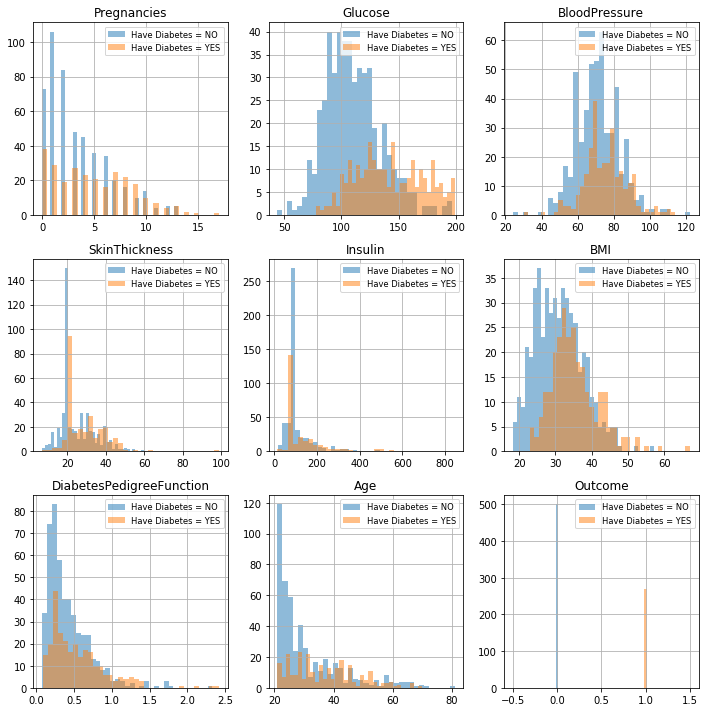

In [171]:
def histograms_plot(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (10,10))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe.groupby("Outcome")[feature].hist(bins = 35, ax = ax, alpha = 0.5, fill = "Outcome")
        ax.set_title(feature)
        ax.legend(["Have Diabetes = NO", "Have Diabetes = YES"], fontsize = "small")

    fig.tight_layout()  
    plt.show()
histograms_plot(data, data.columns, 3, 3)

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [173]:
X = data[data.columns[~data.columns.isin(["Outcome"])]]
y = data["Outcome"]

In [174]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [175]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [176]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13)

In [177]:
print(x_test.shape, y_test.shape)

(231, 8) (231,)


In [178]:
print(x_train.shape, y_train.shape)

(537, 8) (537,)


In [179]:
def print_metrics(model):
    A = accuracy_score(model.predict(x_test), y_test)
    P = precision_score(model.predict(x_test), y_test)
    R = recall_score(model.predict(x_test), y_test)
    print("Accuracy:", A, "Precision:", P, "Recall:", R)
    

In [180]:
BG = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 10, random_state = 13)

In [181]:
BG.fit(x_train, y_train);

In [182]:
print_metrics(BG)

Accuracy: 0.7316017316017316 Precision: 0.5287356321839081 Recall: 0.6865671641791045


In [183]:
RF = RandomForestClassifier(n_estimators = 10, random_state = 13)

In [184]:
RF.fit(x_train, y_train);

In [185]:
print_metrics(RF)

Accuracy: 0.7402597402597403 Precision: 0.5057471264367817 Recall: 0.7213114754098361


Accuracy выше у случайного леса, precision чуть выше у бэггинга, а чуть выше recall у случайного леса. При этом, в обоих случаях precision меньше, чем recall. Может быть, такие результаты получились из-за не слишком сбалансированной выборки – поэтому найти все положительные объекты модели относително легко удается, а добиться того, чтоб в положительный класс попадали только положительные объекты – не очень. 

In [186]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Нулевого класса 65% во всей выборке – очень много нулевых объектов могут стать false positive. И наоборот, поскольку объектов первого класса мало, скорее всего, мы получим мало false negatives. FP учитывается в precision, FN – в recall, поэтому recall получается довольно высокий, а precision не очень. 

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [62]:
from sklearn.metrics import roc_auc_score

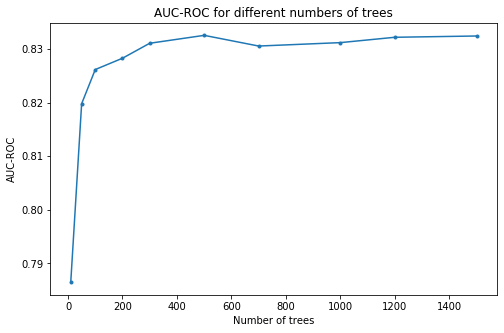

In [63]:
n_trees = [10, 50, 100, 200, 300, 500, 700, 1000, 1200, 1500]
quals_test = []
for n in n_trees:
    rf = RandomForestClassifier(n_estimators = n, random_state = 13)
    rf.fit(x_train, y_train)
    q_test = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])
    quals_test.append(q_test)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals_test, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC for different numbers of trees")


plt.show()

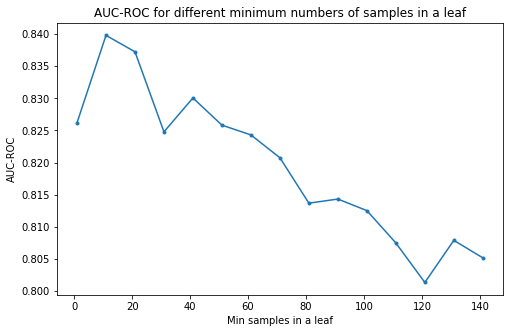

In [64]:
min_leafs = range(1, 150, 10)
quals_test = []
for n in min_leafs:
    rf = RandomForestClassifier(min_samples_leaf = n, n_estimators = 100, random_state = 13)
    rf.fit(x_train, y_train)
    q_test = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])
    quals_test.append(q_test)
    
plt.figure(figsize=(8, 5))
plt.plot(min_leafs , quals_test, marker='.')
plt.xlabel('Min samples in a leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC for different minimum numbers of samples in a leaf")


plt.show()

Лучшее качество моделей выходит при n_trees = 500 или при min_samples_leaf равному 10 (при использовании дефолтного числа деревьев – 100). На втором графике видим некоторую неустойчивость – AUC-ROС в нескольких местах скачет вверх и вниз. Но тем не менее видно, что с повышением минимального числа объектов в листе модель начинается недообучаться и показывает плохое качество на тесте. Возможно, это также вызвано несбалансированностью классов или относительно небольшим размером выборки.   

При этом, несмотря на то что результаты колеблются для min_samples_leaf, они остаются в довольно узком диапазоне 0.800–0.840 – то есть разницу мы наблюдаем не такую уж и большую даже при довольно большом диапазоне значений этого параметра. 

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

In [187]:
RF = RandomForestClassifier(random_state = 13)
RF.fit(x_train, y_train)
for name, score in zip(x_train.columns, RF.feature_importances_):
    print(name, score)

Pregnancies 0.08904875978097125
Glucose 0.25854831701580133
BloodPressure 0.08887297399185026
SkinThickness 0.07383528666746873
Insulin 0.06575984362368432
BMI 0.15951855897305342
DiabetesPedigreeFunction 0.12412387327512174
Age 0.14029238667204894


Да, не все переменные оказываются важны. Самый важный признак – Glucose, показатель глюкозы в крови после теста (когда дают пить много водички с сахаром).  Не удивительно, что он самый важный, так как этот тест очень часто используется для выявления диабета (проверяет способность организама производить инсулин и ращеплять глюкозу). Еще из важный – BMI – индес массы тела. Повышенная масса тела и ожирение сильно коррелирует с диабетом 2 типа. С возратом то же самое – часто диабет 2 типа возникает не с рождения, а в более старшем возрасте, с возрастом вероятность развития болезни повышается. 

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [188]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

In [189]:
GB = GradientBoostingClassifier(random_state = 13)
GB.fit(x_train, y_train)
print(print_metrics(GB), "AUC-ROC:", roc_auc_score(y_test, GB.predict_proba(x_test)[:, 1]))

Accuracy: 0.7575757575757576 Precision: 0.6091954022988506 Recall: 0.7066666666666667
None AUC-ROC: 0.8169699872286079


In [190]:
HGB = HistGradientBoostingClassifier(random_state = 13)
HGB.fit(x_train, y_train)
print(print_metrics(HGB), "AUC-ROC:", roc_auc_score(y_test, HGB.predict_proba(x_test)[:, 1]))

Accuracy: 0.7445887445887446 Precision: 0.5747126436781609 Recall: 0.6944444444444444
None AUC-ROC: 0.7934227330779055


Пока что HistGradientBoostingClassifier выдает качество хуже, чем обычный бустинг

Чем отличается HistGradientBoostingClassifier от обычного градиентного бустинга: значения всех признаков в датасете разбиваются на что-то вроде гистограммы – "each feature of the input array X is binned into integer-valued bins", то есть значения группируются в некоторое число интервалов равной ширины – из-за этого очент сильно уменьшается число возможных разбиений в каждой вершине. Подобный метод позволяет модели работать быстрее (особенно если большой датасет в 10000+ фичей) + отельный интервал зарезрвирован под пропущенные значения. Благодаря этому, HistGradientBoostingClassifier хорошо работает с пропущенными признаками и позволяет не заниматься дополнительно импутацией данных до обучения моделей. При обучении, объекта с пропущенным значением по данному признаку отправляются поочередно в левую и правую дочернюю вершину, далее оценивается изменение качества модели и определяется, куда они пойдут в итоге. Если во время обучения не было встречено пропущенных переменных, а в тестовых даннных они есть, то такие объекты пойдут в вершину, где больше значений с имеющимися данными (чтобы они не сконцентрировались в вершине, где мало данных, и не испортили предсказание) 

Не очень ясно, чем это все нам тут поможет, так как пропущенных значений у нас нет, а признаков всего 8. 

In [69]:
from sklearn.model_selection import GridSearchCV 

In [70]:
param_grid = {"n_estimators": [10, 20, 25, 50, 60, 70, 80, 100, 200]}
gsearch1 = GridSearchCV(GradientBoostingClassifier(random_state = 13), param_grid, cv = 5)
gsearch1.fit(x_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_, gsearch1.score(x_test, y_test)

({'mean_fit_time': array([0.06048393, 0.07496943, 0.09393902, 0.16088028, 0.28534207,
         0.23095689, 0.23863916, 0.30740418, 0.60070782]),
  'std_fit_time': array([0.04130186, 0.01579519, 0.01071574, 0.00888353, 0.10879052,
         0.04020173, 0.00565885, 0.00244961, 0.02709296]),
  'mean_score_time': array([0.00686884, 0.00814943, 0.00701513, 0.00689964, 0.00910025,
         0.00762496, 0.0068686 , 0.00716276, 0.00772219]),
  'std_score_time': array([0.00087696, 0.00309027, 0.00084042, 0.0006308 , 0.00550088,
         0.00193793, 0.00110324, 0.00094282, 0.0007683 ]),
  'param_n_estimators': masked_array(data=[10, 20, 25, 50, 60, 70, 80, 100, 200],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 10},
   {'n_estimators': 20},
   {'n_estimators': 25},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimator

In [71]:
param_grid = {"max_iter":  [10, 20, 25, 50, 60, 70, 80, 100, 200]} #наксолько я поняла из документации, 
#для бинарной классификации max_iter соотвествует числу деревьев
gsearch2 = GridSearchCV(HistGradientBoostingClassifier(random_state = 13), param_grid, scoring = "precision", cv = 5)
gsearch2.fit(x_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_, gsearch2.score(x_test, y_test)

({'mean_fit_time': array([0.17594738, 0.66137409, 0.56280456, 1.16970463, 1.49474187,
         1.57323966, 1.02771878, 1.12477388, 2.89029136]),
  'std_fit_time': array([0.10822447, 0.37453409, 0.30177352, 0.38255554, 1.18940069,
         0.5300209 , 0.49810707, 0.16020565, 1.35436204]),
  'mean_score_time': array([0.01218562, 0.02743807, 0.0169291 , 0.01406841, 0.02219677,
         0.02129798, 0.01771607, 0.02366061, 0.03174896]),
  'std_score_time': array([0.00681384, 0.02937455, 0.00879372, 0.00519313, 0.0100952 ,
         0.00722102, 0.01211276, 0.00757488, 0.02119576]),
  'param_max_iter': masked_array(data=[10, 20, 25, 50, 60, 70, 80, 100, 200],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'max_iter': 10},
   {'max_iter': 20},
   {'max_iter': 25},
   {'max_iter': 50},
   {'max_iter': 60},
   {'max_iter': 70},
   {'max_iter': 80},
   {'max_iter': 100},
 

In [72]:
GB = GradientBoostingClassifier(n_estimators = 20, random_state = 13)
GB.fit(x_train, y_train)
print(print_metrics(GB), "AUC-ROC:", roc_auc_score(y_test, GB.predict_proba(x_test)[:, 1]))

Accuracy: 0.7575757575757576 Precision: 0.5287356321839081 Recall: 0.7540983606557377
None AUC-ROC: 0.8212005108556832


In [73]:
HGB = HistGradientBoostingClassifier(max_iter = 20)
HGB.fit(x_train, y_train)
print(print_metrics(HGB), "AUC-ROC:", roc_auc_score(y_test, HGB.predict_proba(x_test)[:, 1]))

Accuracy: 0.7489177489177489 Precision: 0.5402298850574713 Recall: 0.7230769230769231
None AUC-ROC: 0.8103847381864623


Как вы видим, в итоге HistGradientBoostingClassifier классифицирует чуть хуже, чем обычный – но выдает более высокое значение precision. Как было отмечено выше, HistGradientBoostingClassifier имеет свои преимущества, но не то чтобы он предназначен для работы именно с нашими данными – то есть не очень большим датасетом и без пропущенных переменных. В целом в обоих моделях видим то же самое, что с бэггингом и случайным лесом – recall получается выше precision. Видимо, бустинг тоже не очень хорошо работает с нашей несбалансированной выборкой. 

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [74]:
# Можете и сами обучить логистическую поверх ответов, а не использовать `StackingClassifier`

In [75]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [114]:
base_learners = [
                 ('RF', RandomForestClassifier(n_estimators=100, random_state=123)),
                 ('DT', DecisionTreeClassifier(random_state=123))
                ]

In [115]:
clf = StackingClassifier(estimators = base_learners, final_estimator = LogisticRegression(max_iter = 1000))

In [116]:
clf.fit(x_train, y_train)

StackingClassifier(estimators=[('RF', RandomForestClassifier(random_state=123)),
                               ('DT',
                                DecisionTreeClassifier(random_state=123))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [117]:
print_metrics(clf)

Accuracy: 0.7662337662337663 Precision: 0.5402298850574713 Recall: 0.7704918032786885


In [118]:
print("AUC-ROC:", roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]))

AUC-ROC: 0.8301005747126436


Качество несколько улучшилось – precision был выше на бустинге у обоих моделей (самый высокий был у обычного градиентного бустинга до тюнинга гиперпараметров - 0.6), зато recall, accuracy и AUC-ROC самые высокие среди всех моделей. Стекинг видимо привел к тому, что то, что хорошо получалось у базовых моделей – recall, AUC-ROC и accuracy – стали выше, когда precision остался где-то на среднем уровне (не лучшие результаты, но и не худшие). 

Попробую еще с бустингом, так как он выдавал очень хорошие результаты

In [119]:
base_learners2 = [
                 ('GB', GradientBoostingClassifier(random_state = 123)),
                 ('DT', DecisionTreeClassifier(random_state=123))
                ]

In [120]:
clf2 = StackingClassifier(estimators = base_learners2, final_estimator = LogisticRegression(max_iter = 1000))

In [121]:
clf2.fit(x_train, y_train)

StackingClassifier(estimators=[('GB',
                                GradientBoostingClassifier(random_state=123)),
                               ('DT',
                                DecisionTreeClassifier(random_state=123))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [122]:
print_metrics(clf2)

Accuracy: 0.7402597402597403 Precision: 0.5057471264367817 Recall: 0.7213114754098361


In [123]:
print("AUC-ROC:", roc_auc_score(y_test, clf2.predict_proba(x_test)[:, 1]))

AUC-ROC: 0.8128192848020434


Well, видимо сам по себе бустинг работает хорошо, а на стеке выдал средние результаты (и precision ниже среднего)

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>